6 DATAFRAMES
- big_merge
- merged_empl
- merged_jus
- jail
- gender_justice
- judges

This project aims to explore the correlations between gender disparities in education, employment, and domestic violence and the number of incarcerated individuals. 
A key question driving this analysis is:

Whether the lower number of imprisoned women reflects a genuinely lower crime rate among women or if it stems from systemic biases in the judicial process. Are women less likely to commit crimes, or are they judged more leniently? 

Furthermore, does the composition of the justice system—historically dominated by men—influence sentencing outcomes and legal decisions? 

By analyzing these factors, this study seeks to uncover potential gender-based disparities in criminal justice and their broader societal implications.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
big_merge=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/big_merge.csv')

In [3]:
merged_empl=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/merged_empl.csv')

In [4]:
merged_jus=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/merged_jus.csv')

In [5]:
jail=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/jail.csv')

In [6]:
gender_justice=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/gender_in_justice.csv')

In [7]:
judges=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/judges_gender.csv')

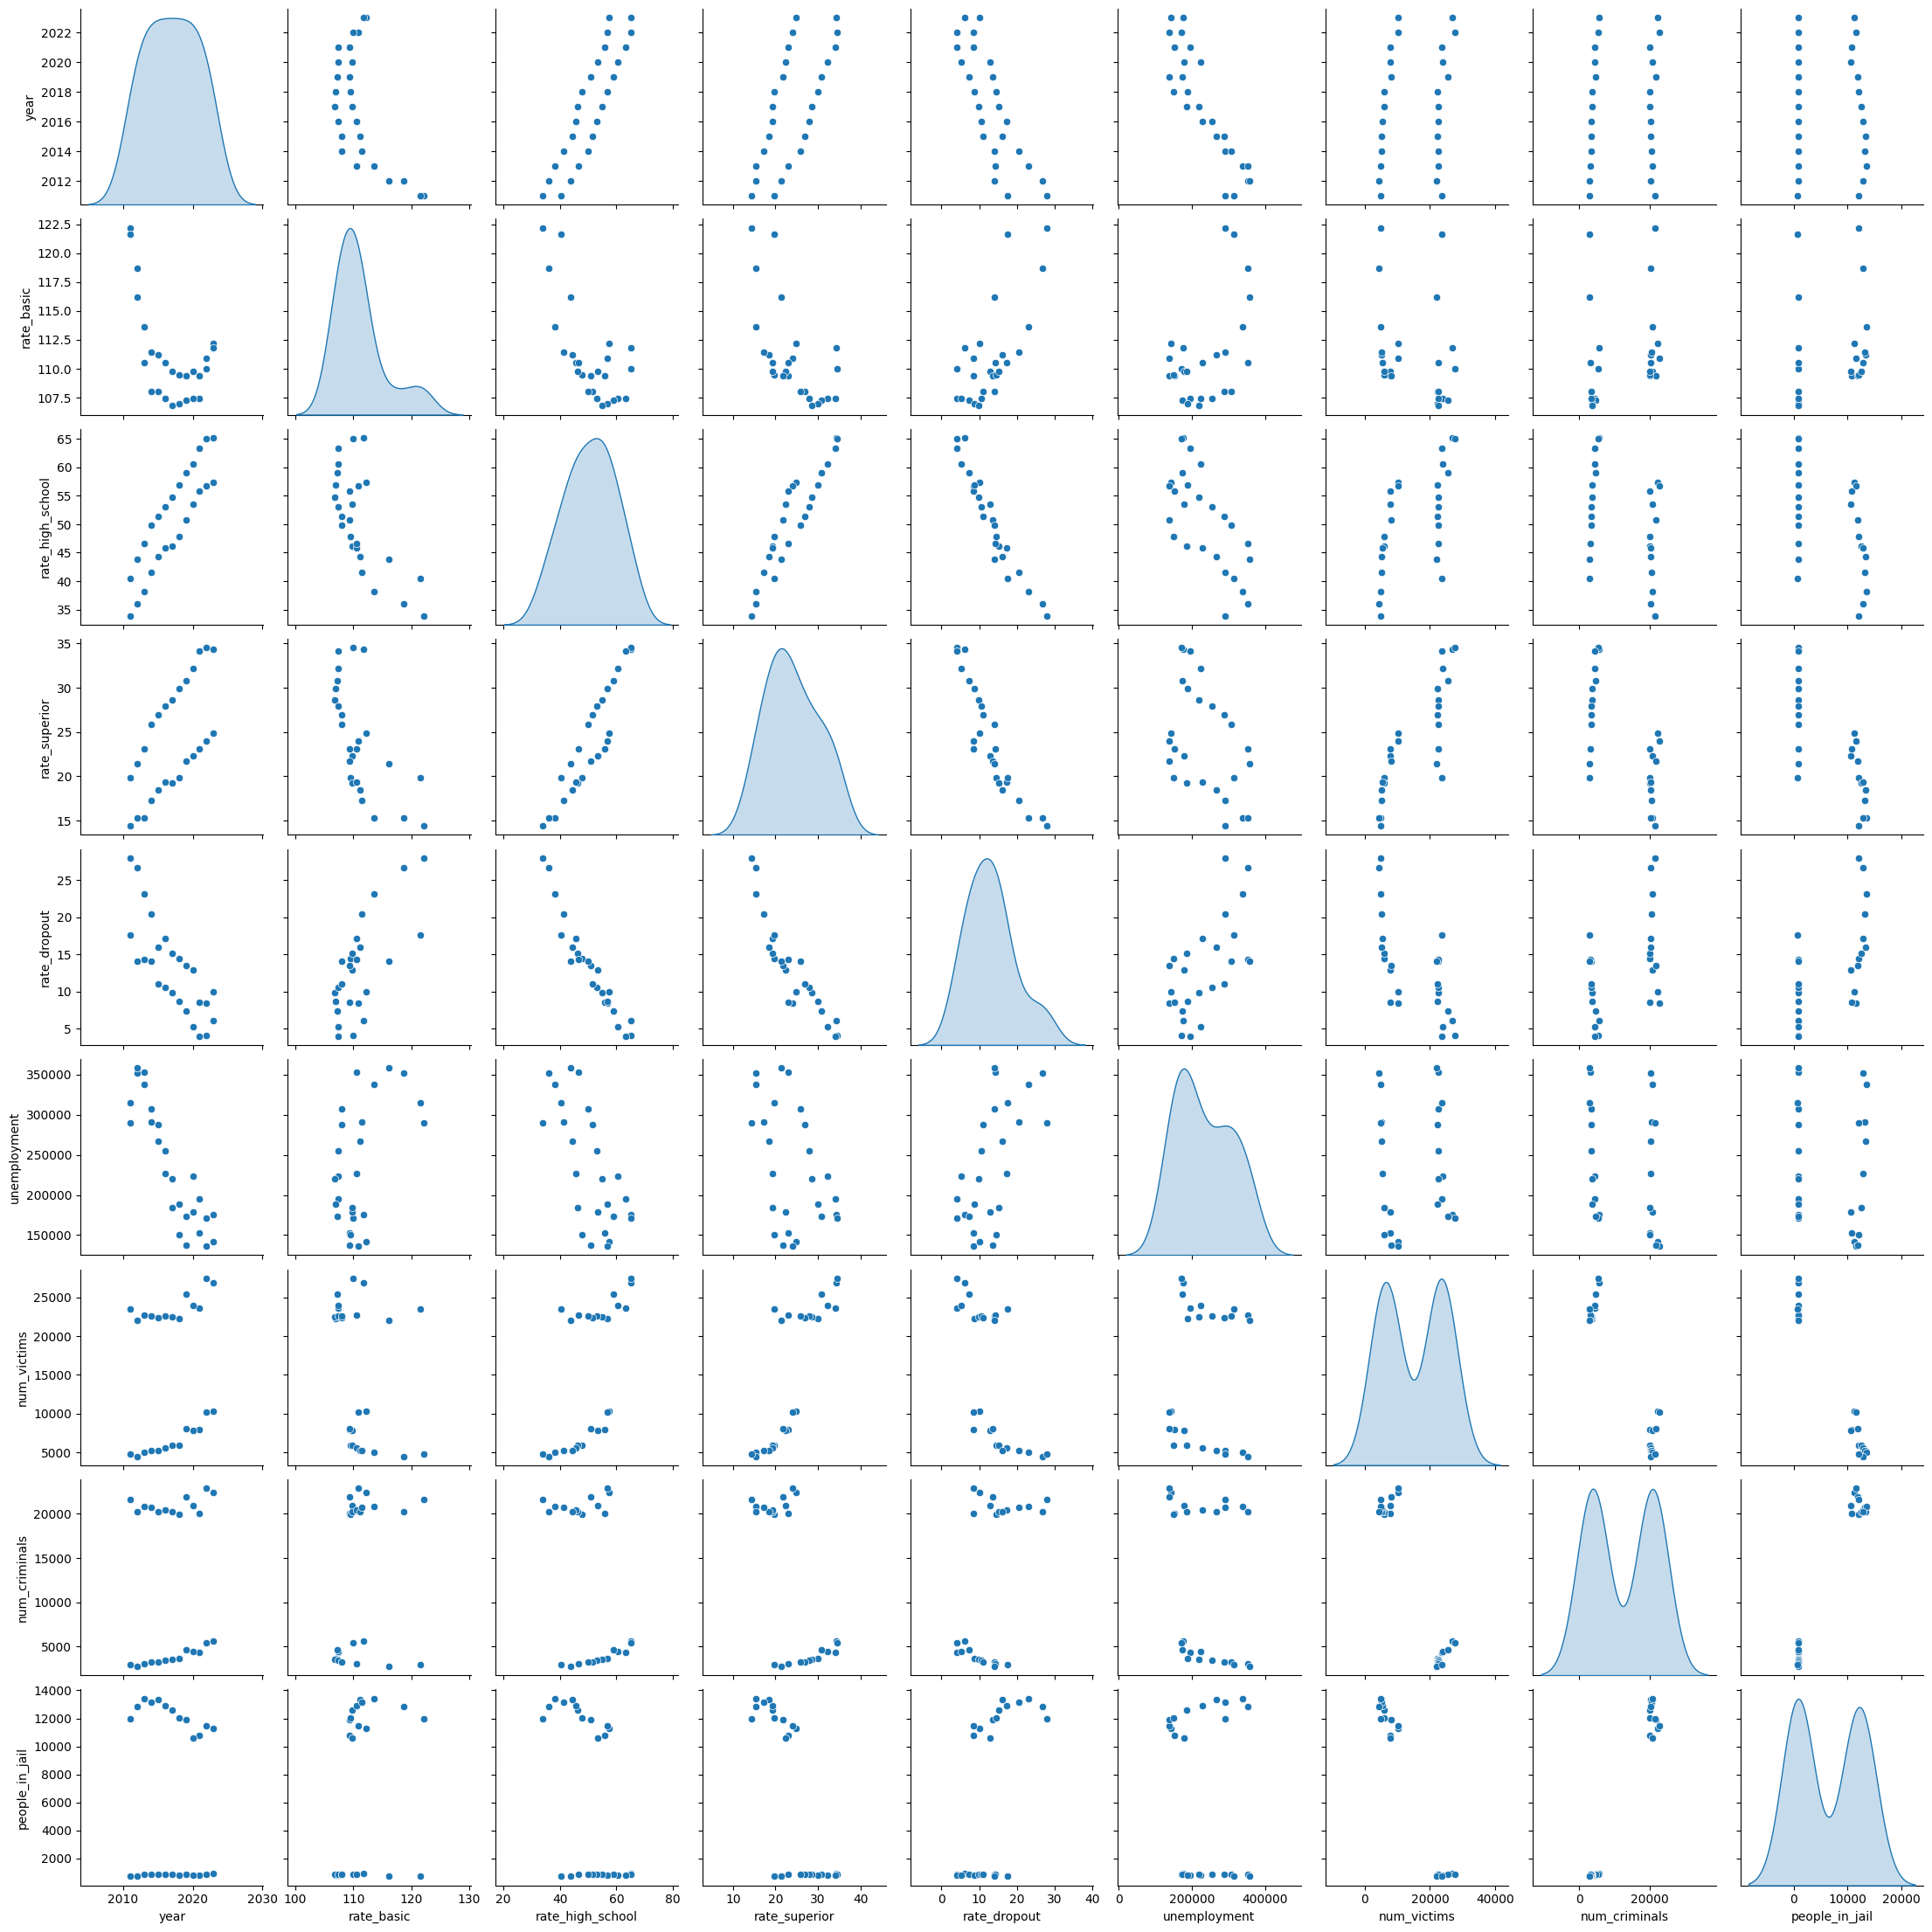

In [9]:
filtered_df = big_merge.loc[big_merge['gender'] != 'both']

sns.pairplot(filtered_df, diag_kind="kde")

plt.show()

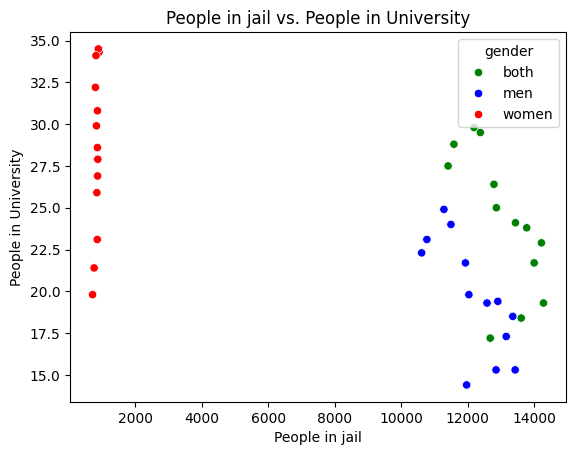

In [13]:
color_dict={'men':'blue', 'women':'red', 'both':'green'}
sns.scatterplot(x=big_merge["people_in_jail"], y=big_merge["rate_superior"], hue=big_merge["gender"], palette=color_dict)
plt.title("People in jail vs. People in University")
plt.xlabel("People in jail")
plt.ylabel("People in University")
plt.show()

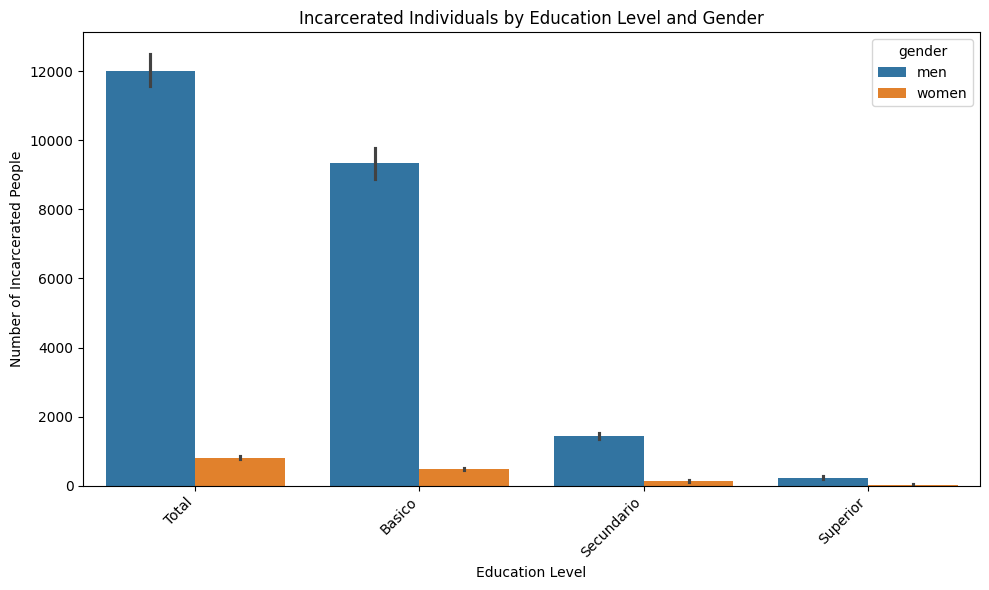

In [15]:
plt.figure(figsize=(10, 6))
jail=jail.loc[(jail['gender']!='both') & (jail['education_level']!='Nenhum')]
sns.barplot(x="education_level", y="number", hue="gender", data=jail)
plt.title("Incarcerated Individuals by Education Level and Gender")
plt.xlabel('Education Level')
plt.ylabel('Number of Incarcerated People')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout() #prevent labels from overlapping
plt.show()

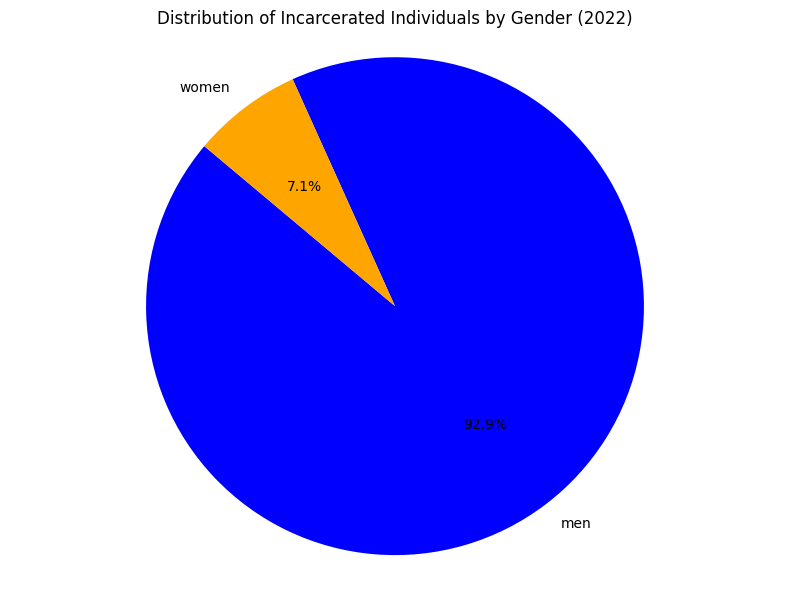

In [16]:
# Filter the DataFrame for the year 2022, 'Total' education level, and only men and women
df_2022 = jail[(jail['year'] == 2022) & (jail['education_level'] == 'Total') & (jail['gender'].isin(['men', 'women']))]

# Extract the data for the pie chart
labels = df_2022['gender']
sizes = df_2022['number']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Distribution of Incarcerated Individuals by Gender (2022)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


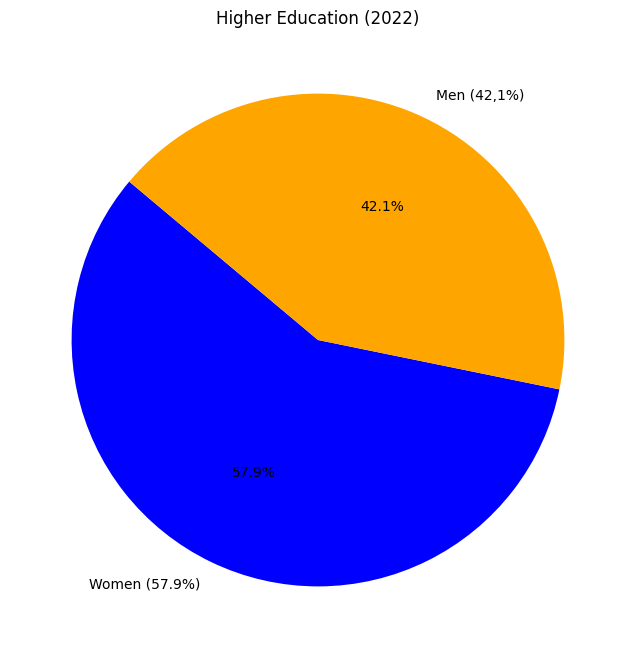

In [17]:
# Total population (for reference)
total = 100  

# Values for each category  
values = [57.9, 42.1]  
labels = ["Women (57.9%)", "Men (42,1%)"
]  

# Create pie chart  
plt.figure(figsize=(8, 8))  
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])  
plt.title("Higher Education (2022)")  
plt.show()  


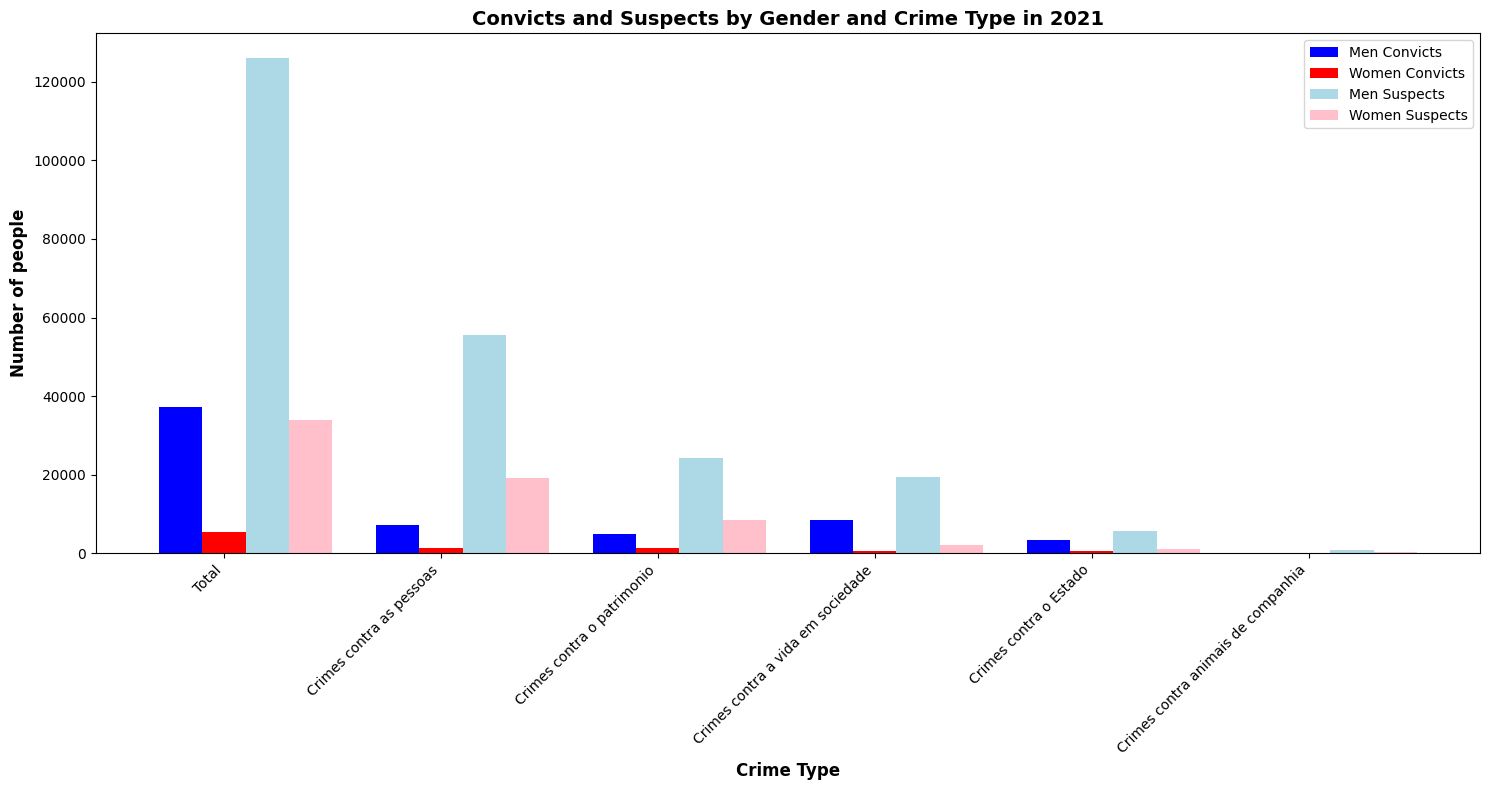

In [19]:

# Select a specific year for this example
year = 2021# Change this to the year you want to visualize

# Filter the data for the selected year
data = merged_jus[merged_jus['year'] == year]

# Get unique crime types
crime_types = data['crime_type'].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Set width of bars
barWidth = 0.2

# Set positions of the bars on X axis
r1 = np.arange(len(crime_types))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create bars
plt.bar(r1, data[data['gender'] == 'men']['num_convicts'], width=barWidth, label='Men Convicts', color='blue')
plt.bar(r2, data[data['gender'] == 'women']['num_convicts'], width=barWidth, label='Women Convicts', color='red')
plt.bar(r3, data[data['gender'] == 'men']['num_identified_suspects'], width=barWidth, label='Men Suspects', color='lightblue')
plt.bar(r4, data[data['gender'] == 'women']['num_identified_suspects'], width=barWidth, label='Women Suspects', color='pink')

# Add labels and title
plt.xlabel('Crime Type', fontweight='bold', fontsize=12)
plt.ylabel('Number of people', fontweight='bold', fontsize=12)
plt.title(f'Convicts and Suspects by Gender and Crime Type in {year}', fontweight='bold', fontsize=14)
plt.xticks([r + barWidth for r in range(len(crime_types))], crime_types, rotation=45, ha='right')

# Create legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


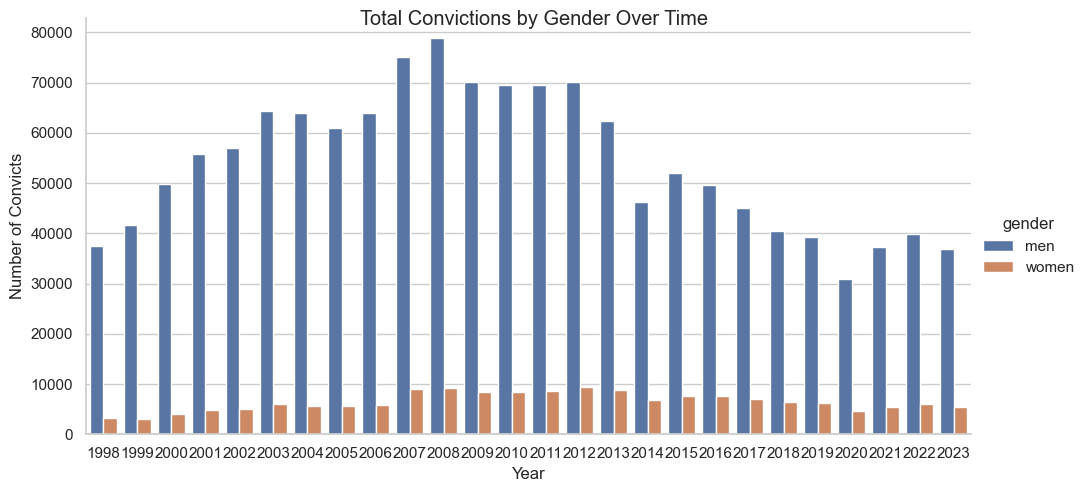

In [21]:
sns.set_theme(style="whitegrid")

# 1. Crime Rates by Gender
g = sns.catplot(data=merged_jus[merged_jus['crime_type'] == 'Total'], 
                x="year", y="num_convicts", hue="gender", kind="bar", aspect=2)
g.set_axis_labels("Year", "Number of Convicts")
g.fig.suptitle("Total Convictions by Gender Over Time")
plt.show()

In [22]:
jail_people=jail.loc[(jail['education_level']=='Total') & (jail['gender']!='both')]
jail_people=jail_people.dropna(axis=0)

In [24]:
merged_jus.isnull().sum()

year                       0
crime_type                 0
gender                     0
num_convicts               0
num_identified_suspects    7
dtype: int64

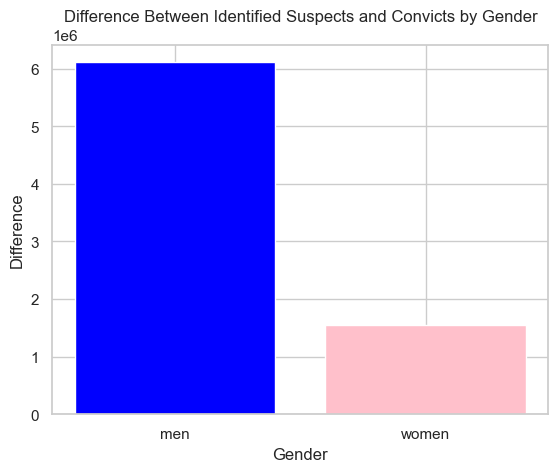

In [27]:
merged_jus_1=merged_jus[merged_jus['crime_type'] != 'Crimes contra animais de companhia']

# Calculate the difference between num_identified_suspects and num_convicts
merged_jus_1['difference'] = merged_jus_1['num_identified_suspects'] - merged_jus_1['num_convicts']

# Group by gender and calculate the sum of differences
gender_differences = merged_jus_1.groupby('gender')['difference'].sum()

# Create a bar plot for the differences by gender
plt.bar(gender_differences.index, gender_differences.values, color=['blue', 'pink'])
plt.title('Difference Between Identified Suspects and Convicts by Gender')
plt.xlabel('Gender')
plt.ylabel('Difference')
plt.show()


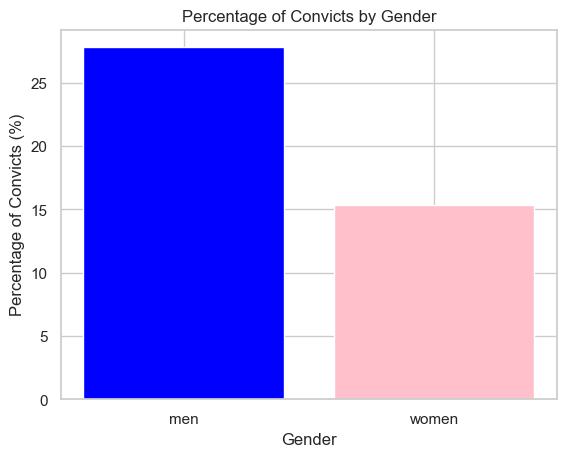

In [28]:
merged_jus_1=merged_jus[merged_jus['crime_type'] != 'Crimes contra animais de companhia']

# Group by gender and sum the values
gender_grouped = merged_jus_1.groupby('gender').sum()

# Calculate the percentage difference
gender_grouped['percentage_difference'] = 100 - ((gender_grouped['num_identified_suspects'] - gender_grouped['num_convicts']) / gender_grouped['num_identified_suspects']) * 100

# Plotting
plt.bar(gender_grouped.index, gender_grouped['percentage_difference'], color=['blue', 'pink'])
plt.title('Percentage of Convicts by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Convicts (%)')
plt.show()



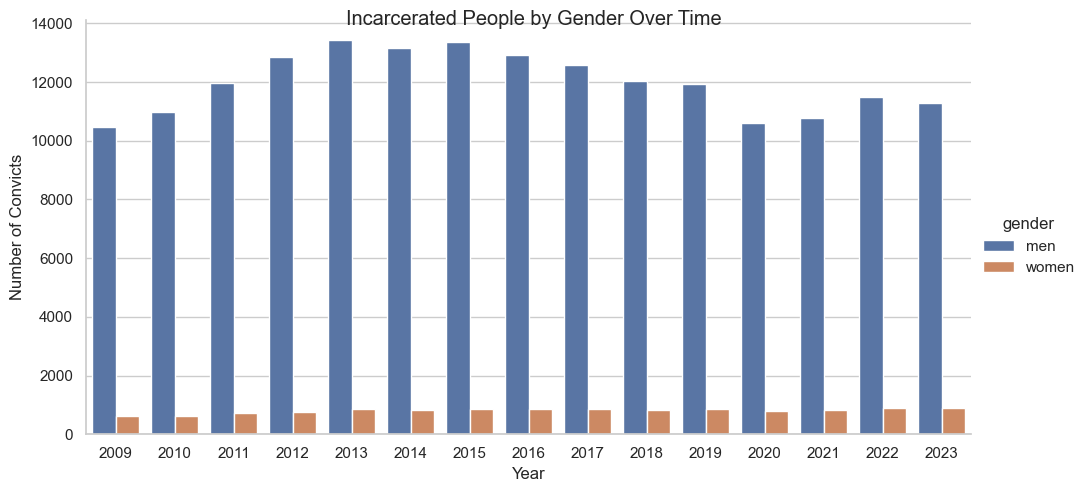

In [30]:
sns.set_theme(style="whitegrid")
# 1. People in jail by Gender
g = sns.catplot(data=jail_people, 
                x="year", y="number", hue="gender", kind="bar", aspect=2)
g.set_axis_labels("Year", "Number of Convicts")
g.fig.suptitle("Incarcerated People by Gender Over Time")
plt.show()

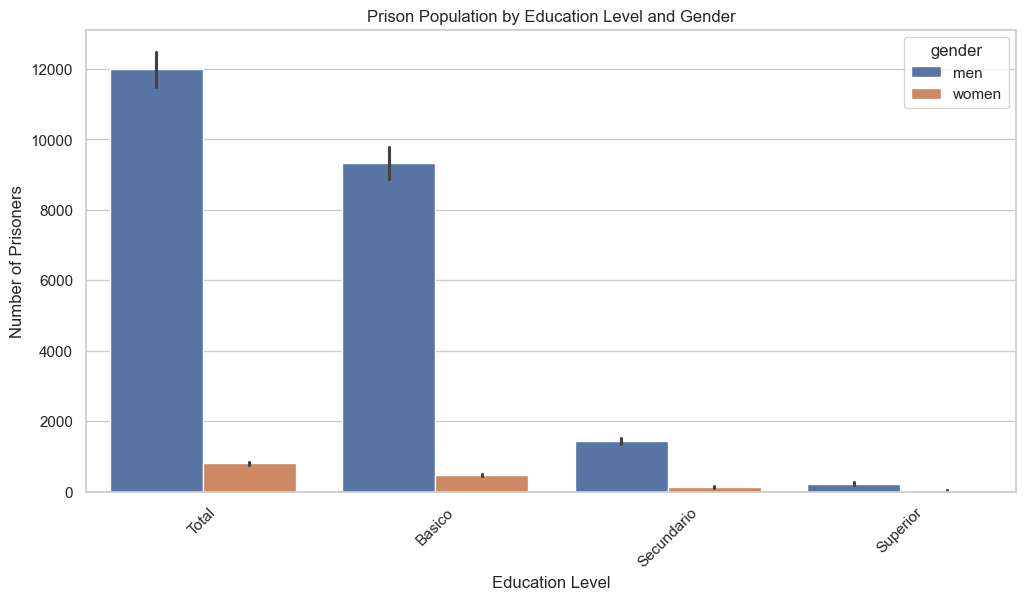

In [31]:
# 2. Prison Population by Education Level & Gender
plt.figure(figsize=(12,6))
sns.barplot(data=jail, x="education_level", y="number", hue="gender")
plt.xticks(rotation=45)
plt.title("Prison Population by Education Level and Gender")
plt.ylabel("Number of Prisoners")
plt.xlabel("Education Level")
plt.show()


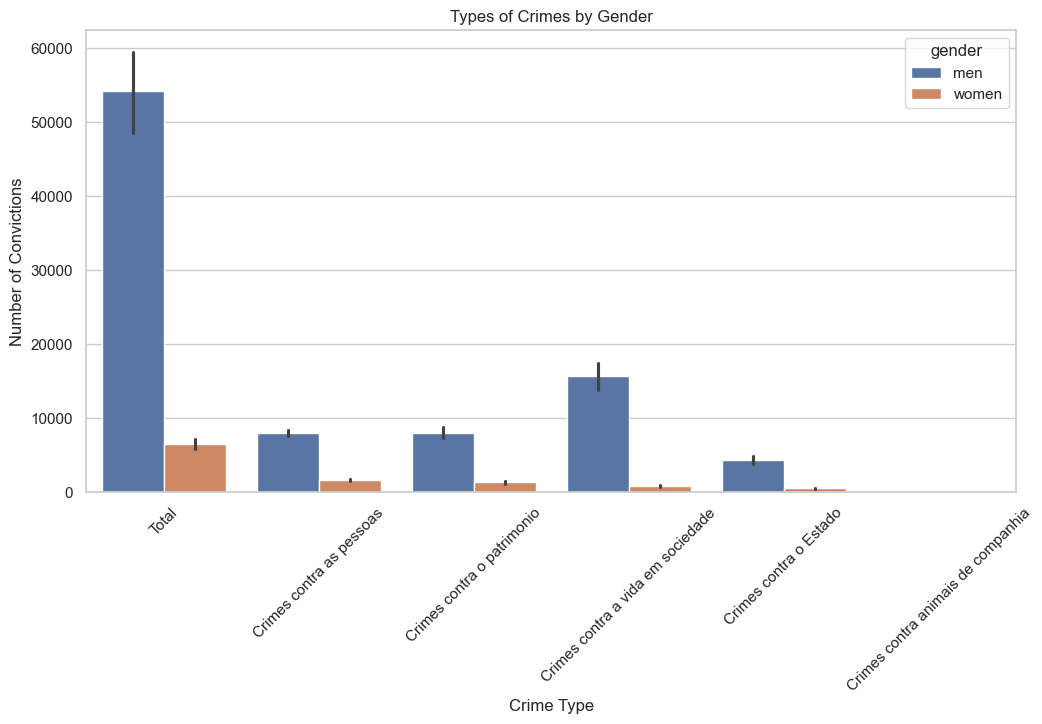

In [33]:
# 3. Criminal Convictions by Crime Type
plt.figure(figsize=(12,6))
sns.barplot(data=merged_jus, x="crime_type", y="num_convicts", hue="gender")
plt.xticks(rotation=45)
plt.title("Types of Crimes by Gender")
plt.ylabel("Number of Convictions")
plt.xlabel("Crime Type")
plt.show()

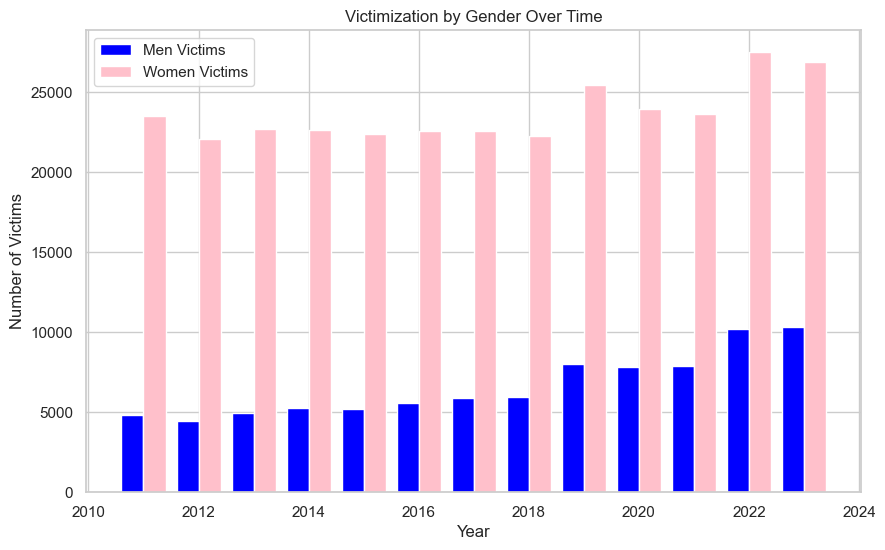

In [34]:
# 4. Victimization vs. Criminality
fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.4
x = big_merge['year'].unique()
men_victims = big_merge[big_merge['gender'] == 'men']['num_victims'].values
women_victims = big_merge[big_merge['gender'] == 'women']['num_victims'].values
plt.bar(x - bar_width/2, men_victims, width=bar_width, label="Men Victims", color='blue')
plt.bar(x + bar_width/2, women_victims, width=bar_width, label="Women Victims", color='pink')
plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.title("Victimization by Gender Over Time")
plt.legend()
plt.show()

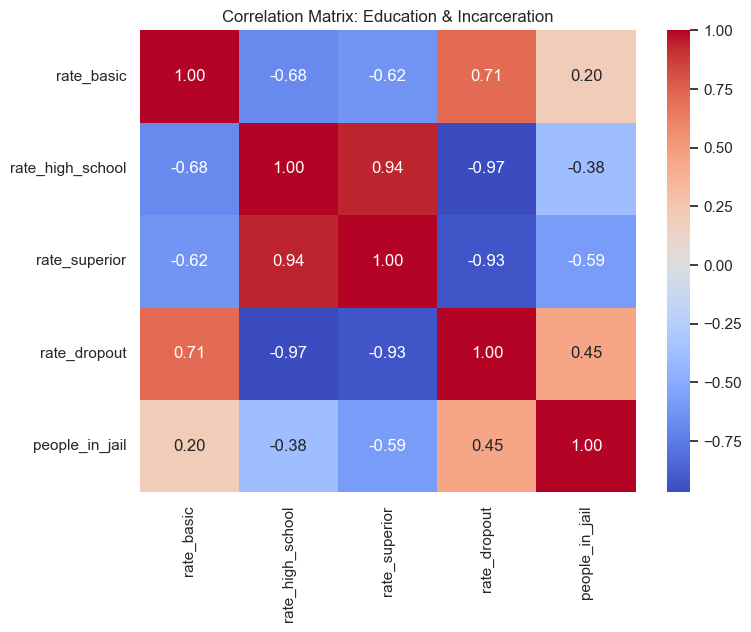

In [38]:
corr_vars = big_merge[['rate_basic', 'rate_high_school', 'rate_superior', 'rate_dropout', 'people_in_jail']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_vars, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Education & Incarceration")
plt.show()

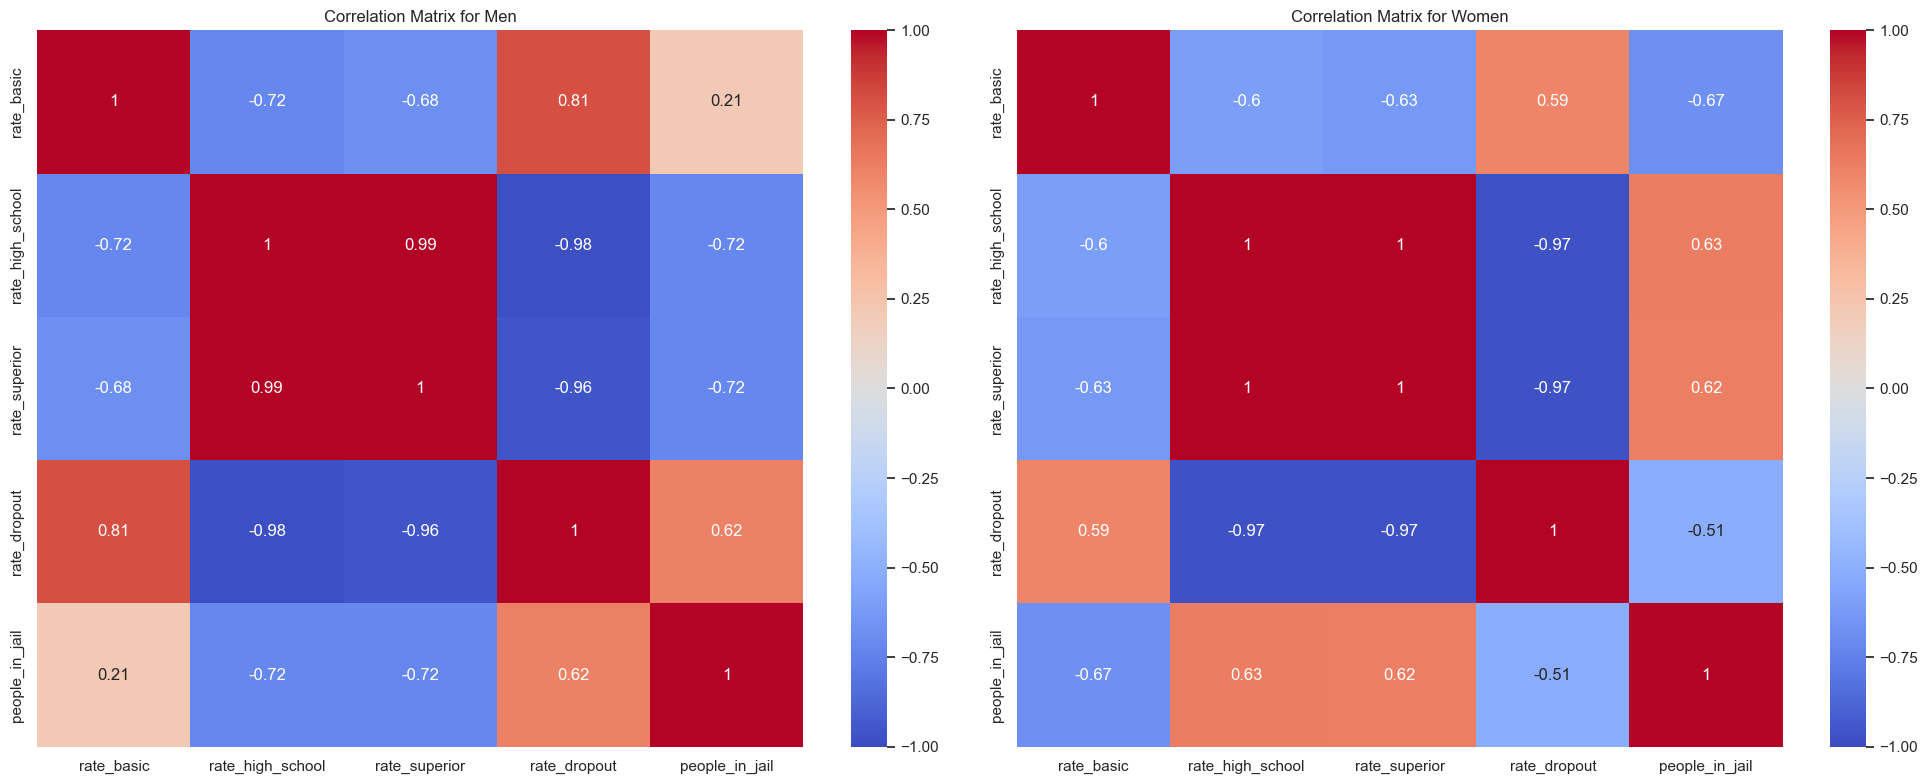

In [39]:
df_men = big_merge[big_merge['gender'] == 'men']
df_women = big_merge[big_merge['gender'] == 'women']

# Select numeric columns for correlation (excluding 'year' and 'gender')
numeric_columns = ['rate_basic', 'rate_high_school', 'rate_superior', 'rate_dropout', 'people_in_jail']

# Calculate correlation matrices
corr_men = df_men[numeric_columns].corr()
corr_women = df_women[numeric_columns].corr()

# Create heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for men
sns.heatmap(corr_men, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax1)
ax1.set_title('Correlation Matrix for Men')

# Heatmap for women
sns.heatmap(corr_women, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax2)
ax2.set_title('Correlation Matrix for Women')

plt.tight_layout()
plt.show()

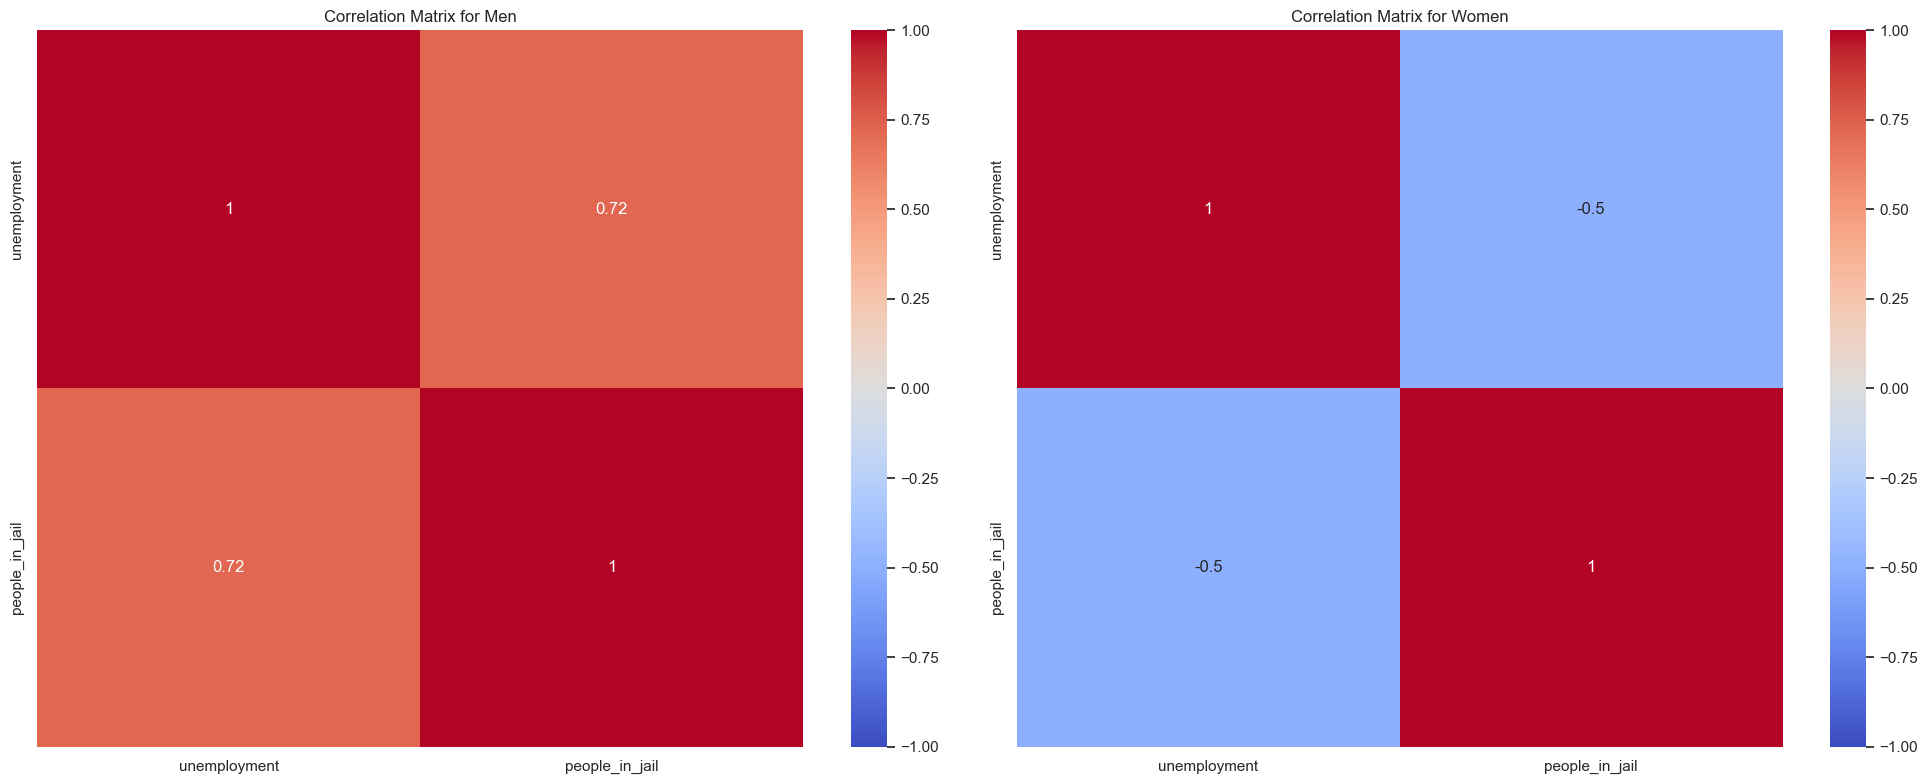

In [40]:
df_men = big_merge[big_merge['gender'] == 'men']
df_women = big_merge[big_merge['gender'] == 'women']

# Select numeric columns for correlation (excluding 'year' and 'gender')
numeric_columns = ['unemployment', 'people_in_jail']

# Calculate correlation matrices
corr_men = df_men[numeric_columns].corr()
corr_women = df_women[numeric_columns].corr()

# Create heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for men
sns.heatmap(corr_men, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax1)
ax1.set_title('Correlation Matrix for Men')

# Heatmap for women
sns.heatmap(corr_women, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax2)
ax2.set_title('Correlation Matrix for Women')

plt.tight_layout()
plt.show()

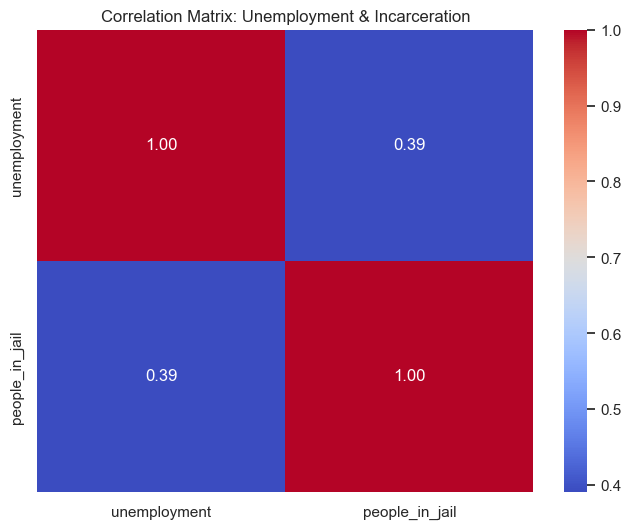

In [41]:
corr_vars = big_merge[['unemployment', 'people_in_jail']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_vars, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Unemployment & Incarceration")
plt.show()

In [42]:
corr_vars

,unemployment,people_in_jail
unemployment,1.000000,0.391339
people_in_jail,0.391339,1.000000


In [47]:
merged_empl_total=merged_empl[merged_empl['activity']=='Total']
merged_empl_total_g=merged_empl_total[merged_empl_total['gender']!='both']
merged_empl_total_g

,year,activity,gender,disparity(%),salary_gross
1,2022,Total,men,6.3,24535
2,2022,Total,women,6.3,21717
58,2018,Total,men,8.9,19624
59,2018,Total,women,8.9,16840
115,2014,Total,men,14.9,18830
116,2014,Total,women,14.9,15638
172,2010,Total,men,12.8,18117
173,2010,Total,women,12.8,15299


In [48]:
jail_total=jail.loc[jail['education_level']=='Total']

In [49]:
salary_jail=merged_empl_total_g.merge(jail_total, on=['year', 'gender'], how='left')
salary_jail

,year,activity,gender,disparity(%),salary_gross,education_level,number
0,2022,Total,men,6.3,24535,Total,11498.0
1,2022,Total,women,6.3,21717,Total,885.0
2,2018,Total,men,8.9,19624,Total,12039.0
3,2018,Total,women,8.9,16840,Total,828.0
4,2014,Total,men,14.9,18830,Total,13162.0
5,2014,Total,women,14.9,15638,Total,841.0
6,2010,Total,men,12.8,18117,Total,10986.0
7,2010,Total,women,12.8,15299,Total,627.0


In [50]:
jail_total

,year,education_level,gender,number
1,2023,Total,men,11287.0
2,2023,Total,women,906.0
16,2022,Total,men,11498.0
17,2022,Total,women,885.0
31,2021,Total,men,10774.0
...,...,...,...,...
467,1992,Total,women,NaN
481,1991,Total,men,NaN
482,1991,Total,women,NaN
496,1990,Total,men,NaN


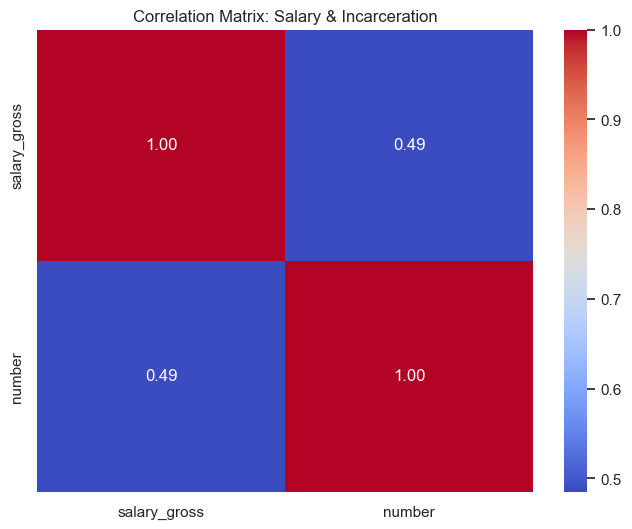

In [51]:
corr_vars = salary_jail[['salary_gross', 'number']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_vars, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Salary & Incarceration")
plt.show()

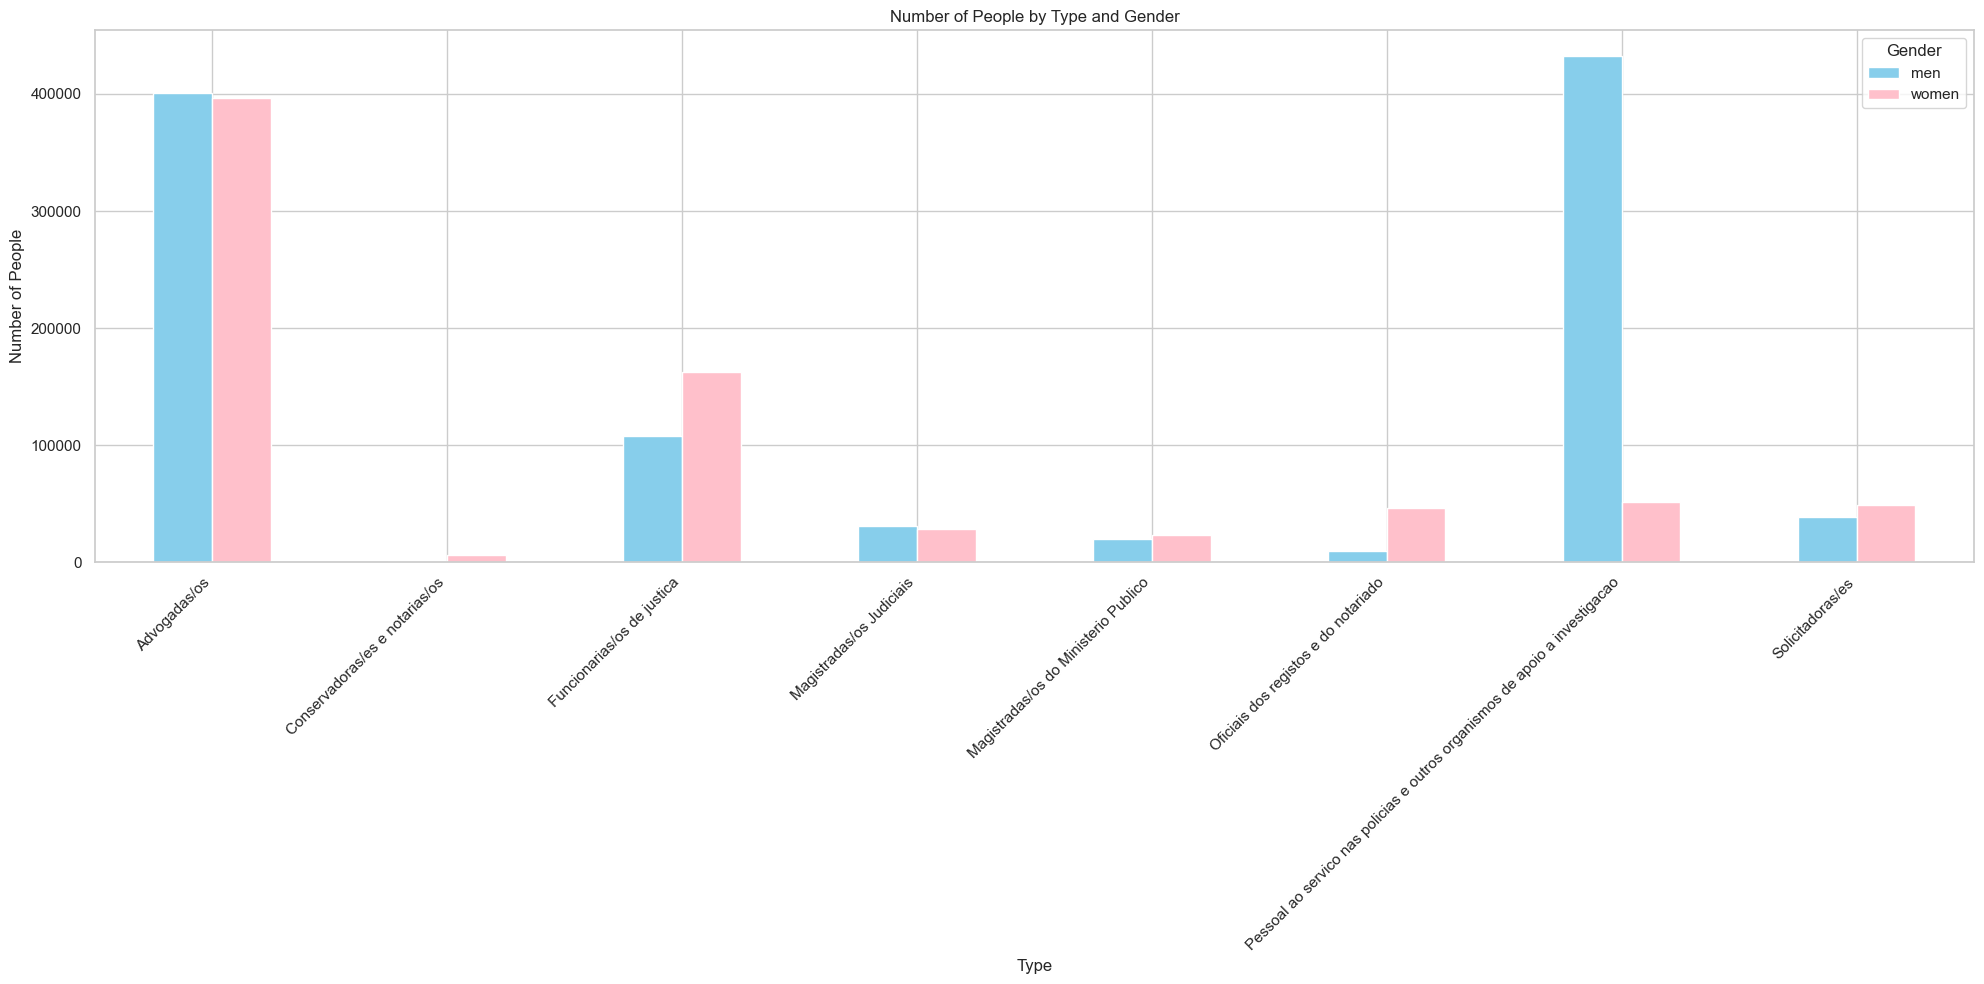

In [56]:
# Filter out 'both' gender
df_filtered = gender_justice[gender_justice['gender'].isin(['men', 'women'])]

# Group by type and gender, then sum the number of people
grouped = df_filtered.groupby(['type', 'gender'])['num_people'].sum().unstack()

# Plotting
grouped.plot(kind='bar', figsize=(20, 10), color=['skyblue', 'pink'])
plt.title('Number of People by Type and Gender')
plt.xlabel('Type')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
